In [2]:
import pandas as pd
import json
import numpy as np
from collections import defaultdict
import os
import statistics
# import imageio

In [3]:
mosaic_df = pd.read_csv('mosaic_workers.csv')

In [4]:
mosaic_df['Input.image'].value_counts()

horse_1_0.jpg    25
horse_2_3.jpg    25
horse_0_0.jpg    25
horse_1_2.jpg    25
horse_2_0.jpg    25
horse_1_3.jpg    25
horse_2_1.jpg    25
horse_2_2.jpg    25
horse_0_1.jpg    24
horse_0_2.jpg    24
horse_1_1.jpg    24
horse_0_3.jpg    23
Name: Input.image, dtype: int64

In [5]:
segments = defaultdict(list)

# each segment has list of responses
# each response has list of lines (might be undone)
# each line has data field with list of points

undo_usage = 0

lines_per_segment = defaultdict(list)
total_num_lines = 0
num_hits = 0 

for _, row in mosaic_df.iterrows():
    num_hits += 1
    worker_id = row['WorkerId']
    segment = row['Input.image']
    response = row['Answer.response']
    response = json.loads(response)
    
    num_lines = sum(1 for line in response if line['undoTimestamp'] is None)
    lines_per_segment[segment].append(num_lines)
    total_num_lines += num_lines

    points = []

    for line in response:
        if line['undoTimestamp'] is not None:
            undo_usage += 1
            continue
            
        for point in line['data']:
            points.append((round(point['x']), round(point['y']), point['timestamp']))

    segments[segment].append(points)

print(undo_usage)

24


In [6]:
for segment, num_lines in lines_per_segment.items():
    print(segment, 'mean =', statistics.mean(num_lines), 'median =', statistics.median(num_lines))

horse_0_1.jpg mean = 1.9583333333333333 median = 1.0
horse_0_2.jpg mean = 0.08333333333333333 median = 0.0
horse_0_3.jpg mean = 0.043478260869565216 median = 0
horse_1_1.jpg mean = 5.208333333333333 median = 3.5
horse_0_0.jpg mean = 1.4 median = 1
horse_1_0.jpg mean = 1.28 median = 1
horse_1_2.jpg mean = 4.28 median = 3
horse_1_3.jpg mean = 3.48 median = 2
horse_2_0.jpg mean = 0.04 median = 0
horse_2_1.jpg mean = 4.4 median = 4
horse_2_2.jpg mean = 3.44 median = 1
horse_2_3.jpg mean = 1.88 median = 1


In [7]:
print(total_num_lines)
print(num_hits)

680
295


In [8]:
def create_image_from_points(img_filename, points):
    img_data = np.zeros((477, 600))
    for x, y, _ in points:
        img_data[y, x] = 1
    imageio.imwrite(img_filename, img_data)

In [9]:
for segment, responses in segments.items():
    create_image_from_points(
        os.path.join('mosaic_segments', segment),
        responses[0],
    )

IndexError: index 477 is out of bounds for axis 0 with size 477

In [10]:
segments

defaultdict(list,
            {'horse_0_1.jpg': [[(-1, 349, 1557211512118),
               (1, 352, 1557211514975),
               (1, 356, 1557211515133),
               (4, 359, 1557211515151),
               (7, 365, 1557211515168),
               (9, 369, 1557211515185),
               (11, 372, 1557211515202),
               (12, 374, 1557211515218),
               (12, 375, 1557211515236),
               (13, 376, 1557211515252),
               (14, 377, 1557211515277),
               (14, 378, 1557211515293),
               (14, 379, 1557211515549),
               (14, 379, 1557211515568),
               (14, 381, 1557211515733),
               (15, 382, 1557211515752),
               (21, 383, 1557211515893),
               (22, 383, 1557211515901),
               (26, 382, 1557211515917),
               (27, 382, 1557211515941),
               (28, 382, 1557211515951),
               (29, 381, 1557211515969),
               (30, 380, 1557211516158),
               (31, 379, 15

In [11]:
import seaborn as sns
sns.distplot(mosaic_df['WorkTimeInSeconds'], bins=30, hist=True, kde=False)

In [12]:
mosaic_df['WorkTimeInSeconds'].describe()

count     295.000000
mean       55.742373
std       203.307970
min         3.000000
25%        13.000000
50%        27.000000
75%        47.000000
max      3319.000000
Name: WorkTimeInSeconds, dtype: float64

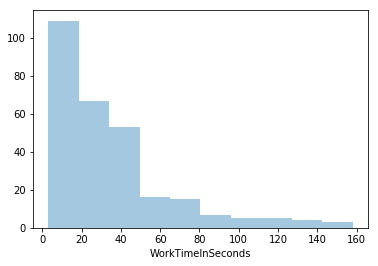

In [13]:
sns.distplot(mosaic_df['WorkTimeInSeconds'].sort_values()[:-11], bins=10, hist=True, kde=False)

In [14]:
mosaic_df['WorkTimeInSeconds'].sort_values()

33        3
64        3
60        3
39        3
30        3
208       3
207       3
201       3
67        3
51        4
36        4
25        4
24        4
40        4
29        4
50        4
44        4
61        4
219       4
63        4
65        4
200       4
69        5
45        5
56        5
41        5
37        5
209       5
28        5
34        5
       ... 
7        93
172      94
165     101
166     101
168     104
249     106
49      110
151     113
109     115
171     117
242     121
254     125
235     133
206     134
232     136
32      140
139     150
88      155
20      158
74      170
227     186
85      188
146     230
222     230
125     259
78      422
101     496
184     584
234     642
271    3319
Name: WorkTimeInSeconds, Length: 295, dtype: int64

In [15]:
len(mosaic_df['WorkerId'].value_counts())

52